In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [ ]:
from scipy.optimize import curve_fit
from scipy.integrate import simpson
from scipy.stats import skew, kurtosis
import matplotlib.dates as mdates

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/csvs/forecast_csv_run_114.csv')
df

,Date,Forecasted Sunspot Number
0,2025-01,184.78
1,2025-02,184.80
2,2025-03,184.76
3,2025-04,184.67
4,2025-05,184.40
...,...,...
79,2031-08,8.09
80,2031-09,6.33
81,2031-10,5.45
82,2031-11,5.70


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Forecasted Sunspot Number']=pd.to_numeric(df['Forecasted Sunspot Number'], errors= 'coerce')
df

,Date,Forecasted Sunspot Number
0,2025-01-01,184.78
1,2025-02-01,184.80
2,2025-03-01,184.76
3,2025-04-01,184.67
4,2025-05-01,184.40
...,...,...
79,2031-08-01,8.09
80,2031-09-01,6.33
81,2031-10-01,5.45
82,2031-11-01,5.70


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/SC25_half_pred.csv')
df2['Date'] = pd.to_datetime(df2['Date'])
df2['mean']=pd.to_numeric(df2['mean'], errors= 'coerce')
df2

,Unnamed: 0,Date,sn1,sn2,sn3,sn4,sn5,sn6,sn7,sn8,...,sn93,sn94,sn95,sn96,sn97,sn98,sn99,sn100,mean,std
0,0,2020-01-01,2.64,1.50,4.17,2.55,1.85,1.23,1.47,0.85,...,1.65,0.55,1.03,0.23,0.96,3.03,3.48,2.71,1.9690,1.147587
1,1,2020-02-01,3.08,2.45,5.74,3.39,2.21,2.20,1.87,2.06,...,2.07,0.80,1.11,1.65,1.39,3.87,3.65,3.15,2.6849,1.513059
2,2,2020-03-01,3.86,3.47,7.41,4.88,1.96,3.90,2.57,2.57,...,2.62,1.88,0.96,3.04,2.11,4.85,3.93,4.09,3.4913,2.038260
3,3,2020-04-01,4.38,5.05,8.78,6.62,1.98,5.68,3.42,3.74,...,3.20,3.55,1.25,3.98,2.77,6.99,4.65,5.73,4.3860,2.718514
4,4,2020-05-01,4.97,6.71,11.16,8.42,1.99,7.46,4.44,5.68,...,3.98,6.33,1.72,5.24,4.20,9.12,7.13,7.95,5.7389,3.728987
5,5,2020-06-01,5.50,8.77,14.83,11.14,2.26,14.87,5.86,8.70,...,4.94,8.45,2.32,6.28,6.60,11.20,10.06,10.50,7.4039,4.417777
6,6,2020-07-01,5.95,11.62,17.78,14.66,2.64,28.27,7.38,11.08,...,6.00,12.26,3.02,6.49,10.86,13.21,13.36,13.25,9.3389,5.478254
7,7,2020-08-01,6.54,15.43,20.19,18.28,3.29,36.63,8.99,14.98,...,6.81,19.17,3.82,7.90,13.36,14.92,16.92,14.61,11.4239,6.488377
8,8,2020-09-01,8.30,19.48,22.76,21.18,4.26,28.33,11.01,17.67,...,7.53,25.79,5.18,9.63,17.75,16.54,19.10,16.25,13.4571,6.966617
9,9,2020-10-01,10.22,21.83,24.34,23.73,5.60,14.84,13.89,19.10,...,9.14,29.66,7.49,11.65,17.48,17.96,19.53,17.97,15.2264,7.309611


In [ ]:
df = df[["Date", "Forecasted Sunspot Number"]]
df2 = df2[["Date", "mean"]]

In [ ]:
df2 = df2.rename(columns={"mean": "Forecasted Sunspot Number"})
df2

,Date,Forecasted Sunspot Number
0,2020-01-01,1.9690
1,2020-02-01,2.6849
2,2020-03-01,3.4913
3,2020-04-01,4.3860
4,2020-05-01,5.7389
5,2020-06-01,7.4039
6,2020-07-01,9.3389
7,2020-08-01,11.4239
8,2020-09-01,13.4571
9,2020-10-01,15.2264


In [ ]:
combined_df = pd.concat([df2, df], ignore_index=True)
combined_df

,Date,Forecasted Sunspot Number
0,2020-01-01,1.9690
1,2020-02-01,2.6849
2,2020-03-01,3.4913
3,2020-04-01,4.3860
4,2020-05-01,5.7389
...,...,...
139,2031-08-01,8.0900
140,2031-09-01,6.3300
141,2031-10-01,5.4500
142,2031-11-01,5.7000


In [ ]:
combined_df.to_csv("combined.csv", index=False)

In [ ]:
from scipy.special import erf
results=[]
def skewed_gauss(x, A, mu, sigma, alpha):
        t = (x - mu) / sigma
        return A * np.exp(-0.5 * t**2) * (1 + erf(alpha * t / np.sqrt(2)))

In [ ]:
x = (combined_df['Date'] - combined_df['Date'].min()).dt.days.values
y = combined_df['Forecasted Sunspot Number'].values


In [ ]:
len(y)

144

In [ ]:
p0 = [max(y), np.median(x), np.std(x), 2]
bounds = ([0, min(x), 0, -10], [np.inf, max(x), np.inf, 10])


Cycle 25 Fitted Parameters:
A = 121.51, mu = 1083.13, sigma = 1545.38, alpha = 2.44


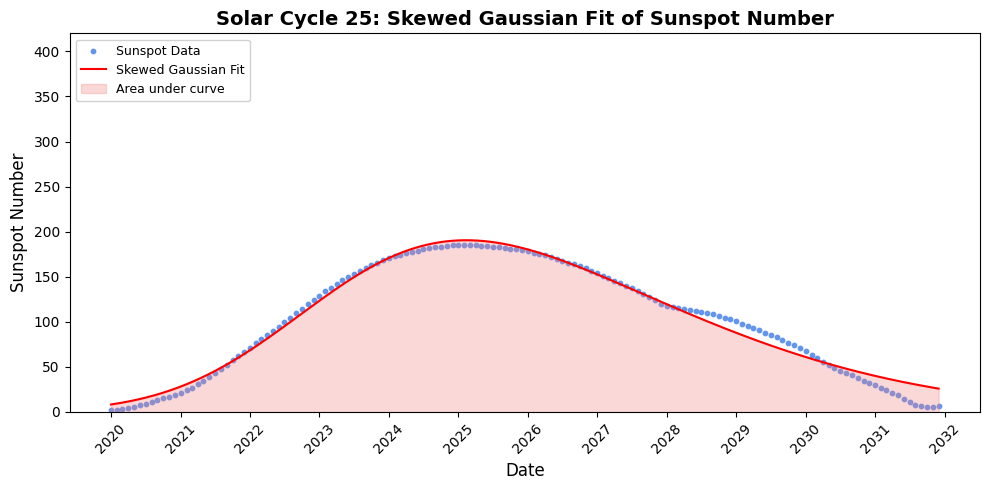

In [ ]:
try:
        params, _ = curve_fit(skewed_gauss, x, y, p0=p0, bounds=bounds, maxfev=10000)
        A, mu, sigma, alpha = params

        x_fit = np.linspace(min(x), max(x), 10000)
        y_fit = skewed_gauss(x_fit, A, mu, sigma, alpha)
        dx = x_fit[1] - x_fit[0]

        cum_area = np.cumsum(y_fit) * dx
        total_area = cum_area[-1]
        cum_area_norm = cum_area / total_area

        skewness = skew(y)
        kurt = kurtosis(y)

        def find_bounds(cum_area, x_fit, level):
            lower_idx = np.argmax(cum_area >= (1 - level) / 2)
            upper_idx = np.argmax(cum_area >= 1 - (1 - level) / 2)
            return x_fit[lower_idx], x_fit[upper_idx]

        x_lower_1sigma, x_upper_1sigma = find_bounds(cum_area_norm, x_fit, 0.6827)
        x_lower_2sigma, x_upper_2sigma = find_bounds(cum_area_norm, x_fit, 0.9545)

        start_ref = combined_df['Date'].min()
        mu_date = start_ref + pd.to_timedelta(mu, unit='D')
        date_lower_1 = start_ref + pd.to_timedelta(x_lower_1sigma, unit='D')
        date_upper_1 = start_ref + pd.to_timedelta(x_upper_1sigma, unit='D')
        date_lower_2 = start_ref + pd.to_timedelta(x_lower_2sigma, unit='D')
        date_upper_2 = start_ref + pd.to_timedelta(x_upper_2sigma, unit='D')

        width_1sigma = x_upper_1sigma - x_lower_1sigma
        width_2sigma = x_upper_2sigma - x_lower_2sigma
        width_1sigma_years = width_1sigma / 365.25
        width_2sigma_years = width_2sigma / 365.25


        area_simpson = simpson(y_fit, x=x_fit)

        print(f"\nCycle 25 Fitted Parameters:")
        print(f"A = {A:.2f}, mu = {mu:.2f}, sigma = {sigma:.2f}, alpha = {alpha:.2f}")


        results.append({
        'Skewness (Data)': skewness,
        'Excess Kurtosis (Data)': kurt,
        'Total Area (Simpson)': area_simpson/ 365.25,
        '1σ Width (years)': width_1sigma_years,
        '2σ Width (years)': width_2sigma_years,
        })


        plt.figure(figsize=(10, 5))
        plt.scatter(combined_df['Date'], y, label='Sunspot Data', color='cornflowerblue', s=10)
        x_dates = start_ref + pd.to_timedelta(x_fit, unit='D')
        plt.plot(x_dates, y_fit, label='Skewed Gaussian Fit', color='red')
        plt.fill_between(x_dates, y_fit, color='lightcoral', alpha=0.3, label='Area under curve')
        plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.xticks(rotation=45)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Sunspot Number", fontsize=12)
        plt.ylim(0, 420)
        plt.title(f"Solar Cycle 25: Skewed Gaussian Fit of Sunspot Number", fontsize=14, weight='bold')
        plt.legend(loc='upper left', fontsize=9, frameon=True, framealpha=0.9)
        plt.tight_layout()
        plt.savefig(("cycle25_fit_enhanced.png"), dpi=300, bbox_inches='tight')
        plt.show()

except Exception as e:
        print(f"\nCycle 25 Error: {e}")



In [ ]:
df_results = pd.DataFrame(results)
df_results

,Skewness (Data),Excess Kurtosis (Data),Total Area (Simpson),1σ Width (years),2σ Width (years)
0,-0.175893,-1.348063,1239.026498,5.261055,9.701075
1,-0.175893,-1.348063,1239.026498,5.261055,9.701075
